In [1]:
import numpy as np
from StatisticalAnalysis import compare_methods

In [2]:
import warnings
warnings.filterwarnings('ignore')

First we load the data and process it to have the correct form.

In [3]:
corr_hc = np.load('corr_hc.npy')
corr_schz = np.load('corr_schz.npy')

In [4]:
corr_hc = corr_hc.reshape(52,118*118)

In [5]:
corr_schz = corr_schz.reshape(50,118*118)

In [6]:
X = np.append(corr_hc,corr_schz,axis=0)

In [7]:
X.shape

(102, 13924)

In [8]:
X[0].shape

(13924,)

In [9]:
Y = np.append(np.zeros(52),np.ones(50),axis=0)

In [10]:
Y.shape

(102,)

Now, we define the algorithms that we are going to use. 

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from scipy.stats import randint as sp_randint

In [12]:
# Decision tree
clfTree = DecisionTreeClassifier(random_state=84)
param_distTree = {"min_samples_split": sp_randint(3, 30)}
# SVM
clfSVC = SVC(random_state=84)
param_distSVC = {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],'kernel': ['rbf'], 'class_weight':['balanced', None]}
# KNN
clfKNN = KNeighborsClassifier()
param_distKNN = {'n_neighbors':sp_randint(3, 30)}
# Logistic regression
clfLR = LogisticRegression(random_state=84)
param_distLR = {'C': [0.1,0.5,1, 10, 100, 1000]}
# Neural Network
clfMLP = MLPClassifier(random_state=84)
param_distMLP = {'activation': ['identity', 'logistic', 'tanh', 'relu'], 'solver': ['lbfgs', 'sgd', 'adam'],
                 'alpha': sp_randint(0.0001, 1), 'learning_rate': ['constant', 'invscaling', 'adaptive'],
                 'hidden_layer_sizes': [(5,2), (3,3,3), (5,3,2), (5,4,3,2)],
                 'momentum': [0.9, 0.95, 0.99]}
# RandomForest
clfRF = RandomForestClassifier(random_state=84)
param_distRF =  {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)], 'max_features': ['auto', 'sqrt'],'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                 'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4],
                 'bootstrap': [True, False]}
# ExtraTreesClassifier
clfET = ExtraTreesClassifier(random_state=84)
param_distET =  {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)], 'max_features': ['auto', 'sqrt'],'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                 'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4],
                 'bootstrap': [True, False]}

In [13]:
listAlgorithms = [clfTree,clfSVC,clfKNN,clfLR,clfMLP,clfRF,clfET]

In [14]:
listParams = [param_distTree,param_distSVC,param_distKNN,param_distLR,param_distMLP,param_distRF, param_distET]

In [15]:
listNames = ["Arbol", "SVM", "KNN", "LR", "MLP","RF","ET"]

# Plain comparison

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.571845 (0.138296)
SVM: 0.638631 (0.136986)
KNN: 0.535536 (0.157887)
LR: 0.653214 (0.127111)
MLP: 0.710060 (0.144832)
RF: 0.635952 (0.126980)
ET: 0.644286 (0.109247)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.969455, p:0.084896
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.170961, p:0.983669
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

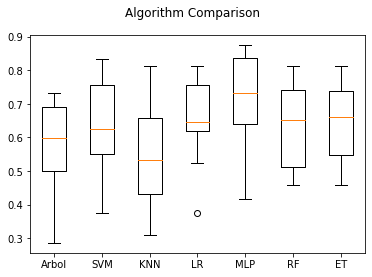

In [16]:
compare_methods(X,Y,listAlgorithms,listParams,listNames,metric='auroc')

# PCA with 2 components

In [17]:
from sklearn.decomposition import PCA

In [18]:
pca = PCA(n_components=2)

In [19]:
pca.fit(X)

PCA(n_components=2)

In [20]:
X_pca2 = pca.transform(X)

In [21]:
X_pca2.shape

(102, 2)

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.563036 (0.144517)
SVM: 0.597560 (0.114921)
KNN: 0.639226 (0.177934)
LR: 0.532500 (0.099141)
MLP: 0.560952 (0.123839)
RF: 0.632381 (0.080458)
ET: 0.520417 (0.083462)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.981573, p:0.392070
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.119516, p:0.361296
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

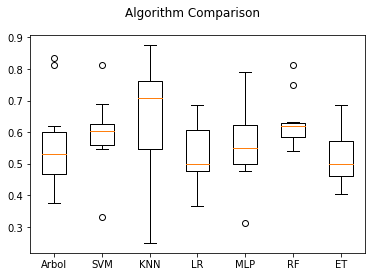

In [22]:
compare_methods(X_pca2,Y,listAlgorithms,listParams,listNames,metric='auroc')

# PCA with 10 components

In [23]:
pca = PCA(n_components=10)

In [24]:
pca.fit(X)

PCA(n_components=10)

In [25]:
X_pca10 = pca.transform(X)

In [26]:
!mv temp.csv temppca2.csv

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.563036 (0.097447)
SVM: 0.628214 (0.141538)
KNN: 0.737024 (0.139408)
LR: 0.591429 (0.203376)
MLP: 0.541429 (0.140943)
RF: 0.563155 (0.148870)
ET: 0.575357 (0.187613)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.979125, p:0.292832
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.863863, p:0.526436
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

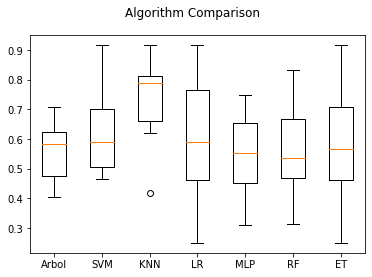

In [27]:
compare_methods(X_pca10,Y,listAlgorithms,listParams,listNames,metric='auroc')

In [28]:
!mv temp.csv temppca10.csv

# PCA with 100 components

In [29]:
pca = PCA(n_components=100)

In [30]:
pca.fit(X)

PCA(n_components=100)

In [31]:
X_pca100 = pca.transform(X)

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.502321 (0.207704)
SVM: 0.658274 (0.139687)
KNN: 0.535536 (0.157887)
LR: 0.653214 (0.127111)
MLP: 0.605179 (0.108865)
RF: 0.466012 (0.146655)
ET: 0.474821 (0.136024)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.967056, p:0.062109
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.435144, p:0.215454
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

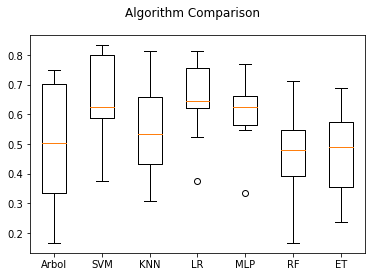

In [32]:
compare_methods(X_pca100,Y,listAlgorithms,listParams,listNames,metric='auroc')

In [33]:
!mv temp.csv temppca100.csv

# TSNE with 2 components

In [34]:
from sklearn.manifold import TSNE

In [35]:
Xtsne2 = TSNE(n_components=2).fit_transform(X)

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.509464 (0.164810)
SVM: 0.598512 (0.144009)
KNN: 0.576131 (0.182785)
LR: 0.532560 (0.137716)
MLP: 0.596667 (0.113469)
RF: 0.579881 (0.095107)
ET: 0.558155 (0.118819)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.974450, p:0.162403
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.417293, p:0.864849
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

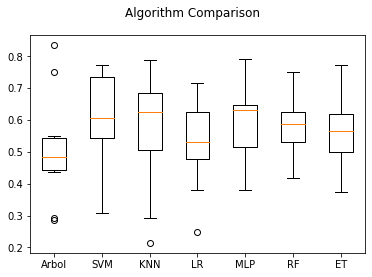

In [36]:
compare_methods(Xtsne2,Y,listAlgorithms,listParams,listNames,metric='auroc')

In [37]:
!mv temp.csv temptsne2.csv

# TSNE with 3 components

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.555298 (0.263285)
SVM: 0.530655 (0.089445)
KNN: 0.475298 (0.200976)
LR: 0.406012 (0.144827)
MLP: 0.548631 (0.091143)
RF: 0.622917 (0.127595)
ET: 0.540298 (0.146553)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.983432, p:0.482984
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 3.594251, p:0.003974
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

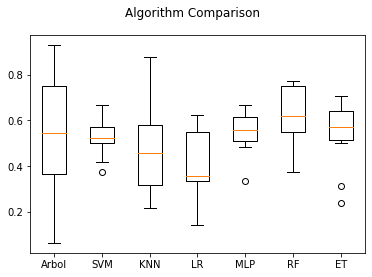

In [38]:
Xtsne3 = TSNE(n_components=3).fit_transform(X)
compare_methods(Xtsne3,Y,listAlgorithms,listParams,listNames,metric='auroc')

In [39]:
!mv temp.csv temptsne3.csv

# UMAP with 2 components

In [40]:
from umap import UMAP

In [41]:
reducer = UMAP()

In [42]:
Xumap = reducer.fit_transform(X)

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.655774 (0.163228)
SVM: 0.637857 (0.146844)
KNN: 0.627024 (0.133351)
LR: 0.652738 (0.138443)
MLP: 0.592321 (0.156775)
RF: 0.662024 (0.175966)
ET: 0.705298 (0.141354)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.973475, p:0.143210
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.218044, p:0.969665
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

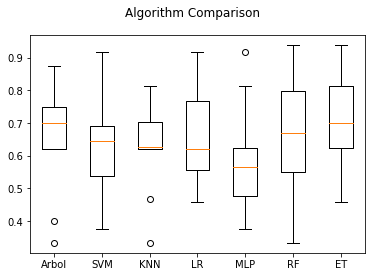

In [43]:
compare_methods(Xumap,Y,listAlgorithms,listParams,listNames,metric='auroc')

In [44]:
!mv temp.csv tempumap2.csv

# UMAP with 10 components

In [45]:
reducer = UMAP(n_components=10)

In [46]:
Xumap10 = reducer.fit_transform(X)

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.656071 (0.175048)
SVM: 0.635655 (0.142111)
KNN: 0.634048 (0.119932)
LR: 0.675655 (0.143709)
MLP: 0.624643 (0.114920)
RF: 0.654405 (0.081830)
ET: 0.626905 (0.135227)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.983975, p:0.511896
The null hypothesis (normality) is accepted
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.281840, p:0.278527
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

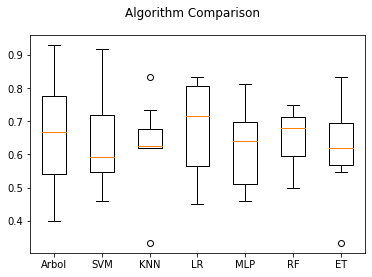

In [47]:
compare_methods(Xumap10,Y,listAlgorithms,listParams,listNames,metric='auroc')

In [48]:
!mv temp.csv tempumap10.csv